# Capstone-Project-aiml
## AIML Online Capstone - Pneumonia Detection Challenge
### Project Objectives
The objective of the project is,  Learn to how to do build an Object Detection Model  Use transfer learning to fine-tune a model.  Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.  Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

## The Real Problem
### What is Pneumonia?
Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or postradiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis. CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift. Pneumonia Detection Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

### Business Domain Value
Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology). Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

### Project Description
In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image. Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb X-rays and appear white in the image. While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia related. In the data, some of these are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images:

Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. Details about the data and dataset files are given in below link, https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

#### Pre-Processing, Data Visualization, EDA
 Exploring the given Data files, classes and images of different classes.  Dealing with missing values  Visualization of different classes  Analysis from the visualization of different classes.

#### Model Building
 Building a pneumonia detection model starting from basic CNN and then improving upon it.  Train the model  To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

#### Test the Model, Fine-tuning and Repeat
 Test the model and report as per evaluation metrics  Try different models  Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. for these models to fine-tune them  Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.

### Reference
Acknowledgment for the datasets. https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U albumentations
# NOTE: NEED TO RESTART RUNTIME AFTER THIS STEP

     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 952kB 25.3MB/s 
     |████████████████████████████████| 38.2MB 130kB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 12.2MB/s 


In [ ]:
import os
import pandas as pd
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import cv2
import datetime
import pytz
import multiprocessing
from sklearn.utils import shuffle
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install kaggle to download the dataset
!pip install -q kaggle

### Setting up kaggle to download datasets

- Please setup the kaggle_path where you have kept the kaggle.json file
- Or create the directory structure in your google drive like MyDrive/Colab/.kaggle/ and upload kaggle.json to this location

In [ ]:
# Ensure you have setup kaggle.json with the required API token and saved it to your google drive mounted above.
# Provide the location of the .kaggle/kagle.json file
kaggle_path = '/content/drive/MyDrive/Colab/.kaggle/'
os.chdir(kaggle_path)
#!export KAGGLE_CONFIG_DIR=/content/drive/MyDrive/Colab/.kaggle/

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle --version

Kaggle API 1.5.4


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.6MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=04cff59d7a155d487f6769cb040eeba28a3e38be38bfa2423be87698cb29bb82
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Kaggle api version should be 1.5.12 or higher
!kaggle --version

Kaggle API 1.5.12


### Import data 
#### Download datasets from kaggle
- Please setup the destination path where you want to install the dataset
- Or create the directory structure as MyDrive/Colab/Capstone Project/ to store the datasets in your google drive

In [ ]:
project_path = '/content/drive/MyDrive/Colab/Capstone Project/'
os.chdir(project_path)
data_path = project_path + 'dataset'

if not os.path.exists(data_path):
    os.makedirs(data_path)

os.chdir(data_path)

# Downloading kaggle dataset from Pneumonia detection challenge
file_path = data_path + '/rsna-pneumonia-detection-challenge.zip'
if not os.path.exists(file_path):
  !kaggle competitions download -q -c rsna-pneumonia-detection-challenge

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab/Capstone Project/dataset'

Dataset is ready to be read and to do EDA

In [ ]:
!ls

'GCP Credits Request Link - RSNA.txt'	  stage_2_sample_submission.csv
 pneumonia_data_resized.npz		  stage_2_test_images
 rsna-pneumonia-detection-challenge.zip   stage_2_train_images
 stage_2_detailed_class_info.csv	  stage_2_train_labels.csv


Unzip the dataset

In [ ]:
import zipfile
if not os.path.exists(data_path + '/' + 'stage_2_train_images'):
  zip_ref = zipfile.ZipFile(data_path + '/rsna-pneumonia-detection-challenge.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
!ls

'GCP Credits Request Link - RSNA.txt'	  stage_2_sample_submission.csv
 pneumonia_data_resized.npz		  stage_2_test_images
 rsna-pneumonia-detection-challenge.zip   stage_2_train_images
 stage_2_detailed_class_info.csv	  stage_2_train_labels.csv


Load Labels

In [ ]:
labels_df = pd.read_csv(data_path + '/stage_2_train_labels.csv')
labels_df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
det_class_info_df = pd.read_csv(data_path + '/stage_2_detailed_class_info.csv')
det_class_info_df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


Remove Duplicates & merge the dataframes into one
- Merge based on patient id

In [ ]:
det_class_info_df = det_class_info_df.drop_duplicates().reset_index(drop=True)

merged_class_df = labels_df.merge(det_class_info_df, left_on='patientId', right_on='patientId', how='inner')
merged_class_df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [ ]:
# Also, created the list of unique class labels and targets 
det_class_info_df['Target'] = det_class_info_df['class'].apply(lambda x: 1 if x =='Lung Opacity' else 0)
det_class_info_df.head()

,patientId,class,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1


In [ ]:
# As Expected the shape of merged df is higher than det_class_info_df. 
# Because the merged df has multiple entries of a single patientId having multiple bounding boxes.
print(merged_class_df.shape, det_class_info_df.shape, labels_df.shape)

(30227, 7) (26684, 3) (30227, 6)


### Exploratory Data Analysis

#### 1. Analyzing Class distribution

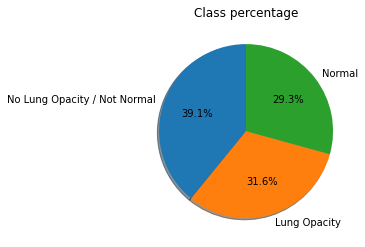

In [ ]:
class_info=merged_class_df["class"].value_counts()
labels = (np.array(class_info.index))
sizes = (np.array((class_info / class_info.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Class percentage")
plt.show()

#### 2. Class distriution with Target class

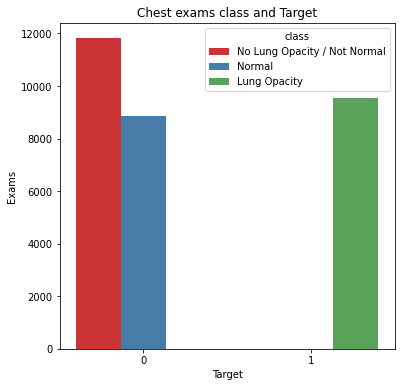

In [ ]:
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
tmp = merged_class_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df, palette='Set1')
plt.title("Chest exams class and Target")
plt.show()


#### 3. Resize 1024x1024 images to lower target size

In [ ]:
#target_img_size=224
target_img_size=416

In [ ]:
# Convert each file
def resizeImage(file):
    global source_folder
    global target_folder
    try:
        dcm_img = dcm.read_file(source_folder + '/' + file + '.dcm')
        target_array = cv2.resize(dcm_img.pixel_array, dsize =(target_img_size,target_img_size),interpolation = cv2.INTER_AREA)
    except Exception as e:
        print(file)
        print(e)
    return target_array;

In [ ]:
# Convert all files within a folder
IST=pytz.timezone('Asia/Kolkata')
def resizeImagesinFolder(folder):
    #filelist= os.listdir(folder)
    filelist = det_class_info_df['patientId']
    print('Resizing', len(filelist), 'files from size - 1024x1024 to', str(target_img_size) + 'x' + str(target_img_size))
    print ('-----------------------------------------------------')
    current_time = datetime.datetime.now(IST).strftime("%H:%M:%S")
    print("Start Time =", current_time)
    pool=multiprocessing.Pool(4)
    outputs=pool.map(resizeImage, filelist)
    pool=None
    current_time = datetime.datetime.now(IST).strftime("%H:%M:%S")
    print("End Time =", current_time)
    return outputs

In [ ]:
#Loading resized image array. 
#If pneumonia_data_resized.npz doesn't exist, then resize first and save it 
source_folder = data_path +'/' + 'stage_2_train_images'
resized_array = []
if not os.path.exists(data_path + '/' + 'pneumonia_data_resized.npz'):
  resized_array = resizeImagesinFolder(source_folder)
  np.savez_compressed(data_path + '/' + 'pneumonia_data_resized.npz', images=resized_array)
  resized_array = np.array(resized_array)
else:
  resized_array = np.load(data_path + '/' + 'pneumonia_data_resized.npz', allow_pickle=True)['images']

Noting down the previous output for reference :

- Resizing 26684 files from size - 1024x1024 to 416x416
- Start Time = 22:24:27
- End Time = 22:52:17

In [ ]:
resized_array.shape

(26684, 416, 416)

#### 4. Visualizing the images

- To validate the resized array against the original image, we are first going to plot the original images and then their resized images

In [ ]:
# This function is to visualize the actual image and the bounding boxes
def plot_dcm_images(ax, patientId, c, bb_box=False):
  dcm_array = dcm.read_file(data_path +'/' + 'stage_2_train_images/' + patientId + '.dcm')
  ax[c//3, c%3].imshow(dcm_array.pixel_array, cmap=plt.cm.bone)
  #print(dcm_array.pixel_array.shape)
  ax[c//3, c%3].set_title('ID: {}\n'.format(patientId))  
  if bb_box:
    for idx, row in merged_class_df[merged_class_df['patientId']==patientId].iterrows():
      #print(idx)
      ax[c//3, c%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                 width=row['width'],height=row['height'],
                 linewidth=1, edgecolor='r', facecolor='none'))

##### a. Visualizing original images and bounding boxes

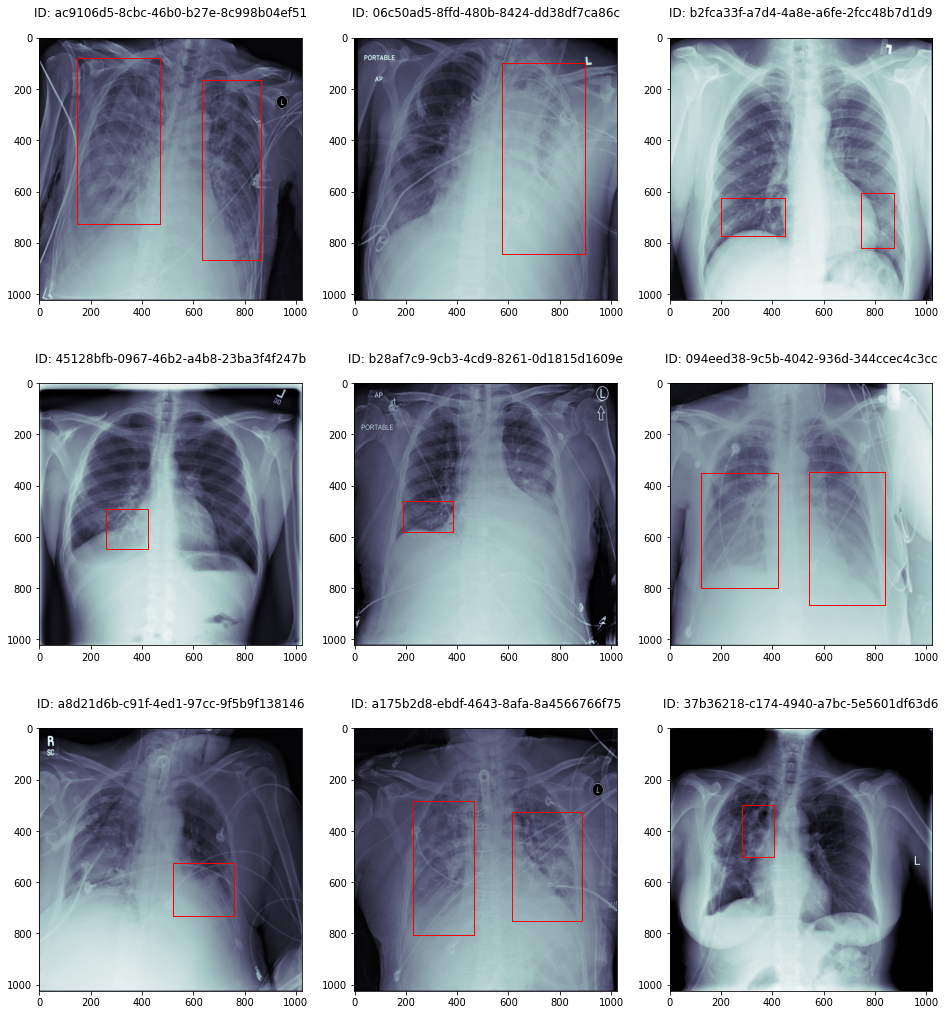

In [ ]:
# Visualizing the original images and bounding boxes
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
image_ids=[]
# Target = 1
for patientId in det_class_info_df[det_class_info_df['Target']==1].patientId.sample(9):
  image_ids.append(patientId)
  plot_dcm_images(ax, patientId, c, True)
  c = c + 1

In [ ]:
# Saved list of patient ID's for visualizing the resized images
for patientID in image_ids:
  print(patientID)

ac9106d5-8cbc-46b0-b27e-8c998b04ef51
06c50ad5-8ffd-480b-8424-dd38df7ca86c
b2fca33f-a7d4-4a8e-a6fe-2fcc48b7d1d9
45128bfb-0967-46b2-a4b8-23ba3f4f247b
b28af7c9-9cb3-4cd9-8261-0d1815d1609e
094eed38-9c5b-4042-936d-344ccec4c3cc
a8d21d6b-c91f-4ed1-97cc-9f5b9f138146
a175b2d8-ebdf-4643-8afa-8a4566766f75
37b36218-c174-4940-a7bc-5e5601df63d6


##### b. Visualizing resized images and readjusted bounding box coordinates

In [ ]:
# Pass bb_box as True for target 1 to draw bounding boxes
def plot_images(ax, patientId, c, bb_box=False):
  idx=np.where(det_class_info_df['patientId']==patientId)
  print(idx)
  ax[c//3, c%3].imshow(resized_array[idx[0][0]], cmap=plt.cm.bone)
  scale = target_img_size / 1024
  ax[c//3, c%3].set_title('ID: {}\n'.format(patientId))
  if bb_box:
    for idx, row in merged_class_df[merged_class_df['patientId']==patientId].iterrows():
      ax[c//3, c%3].add_patch(Rectangle(xy=(row['x']*scale, row['y']*scale),
                 width=row['width']*scale,height=row['height']*scale,
                 linewidth=2, edgecolor="white",fill=False))

(array([16173]),)
(array([252]),)
(array([16908]),)
(array([4261]),)
(array([16870]),)
(array([535]),)
(array([15735]),)
(array([14867]),)
(array([2699]),)


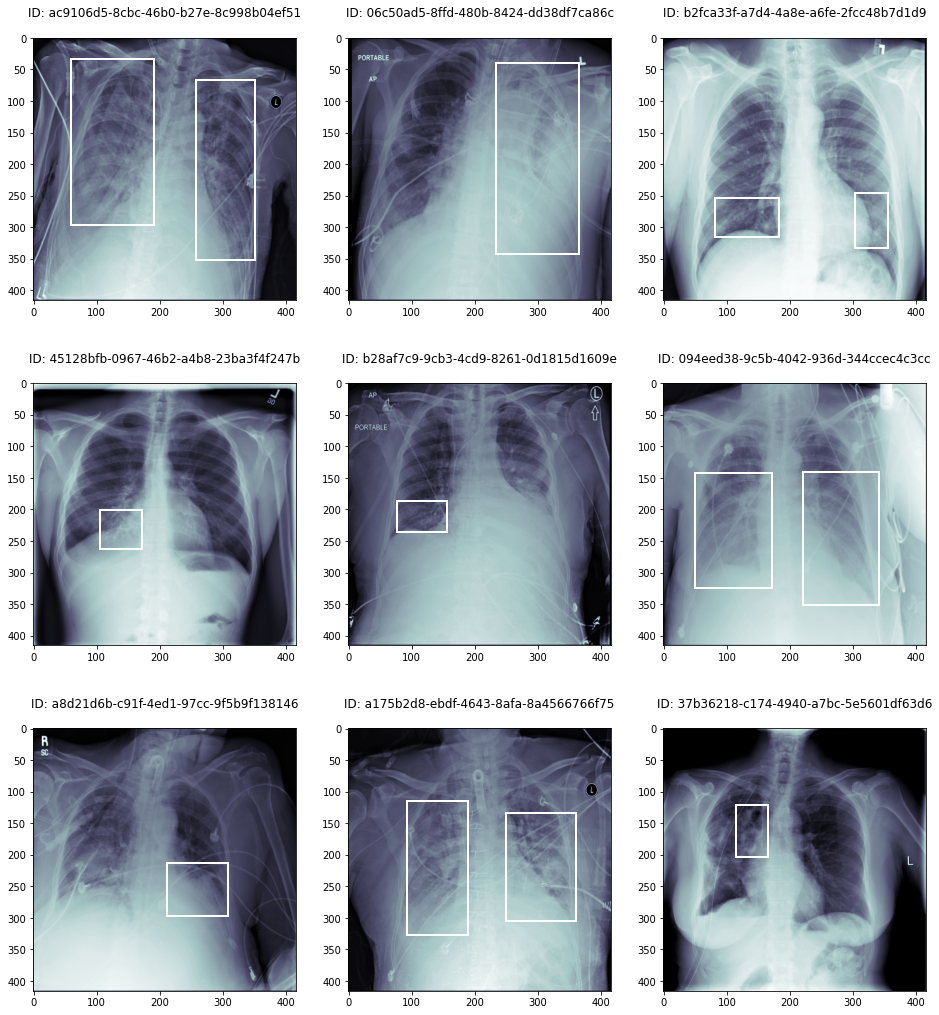

In [ ]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
#image_ids1=[]
# Target = 0
for patientId in image_ids:
  #image_ids1.append(patientId)
  plot_images (ax, patientId, c, True)
  c = c + 1

#### 5. Visualize images without Pneumonia 

(array([9685]),)
(array([19702]),)
(array([17819]),)
(array([26357]),)
(array([16863]),)
(array([1654]),)
(array([12449]),)
(array([21802]),)
(array([26563]),)


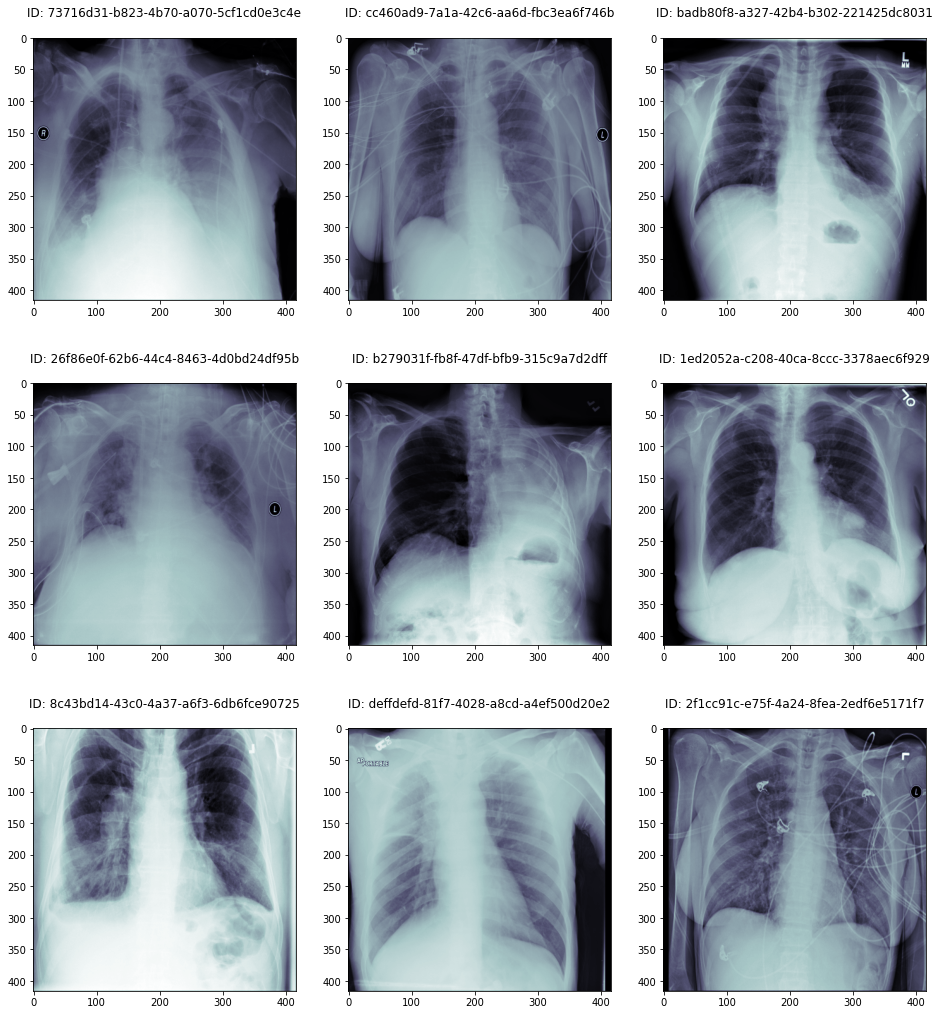

In [ ]:
c = 0
f, ax = plt.subplots(3,3, figsize=(16,18))
# Array for storing the ids that can be used to display DCM 
image_ids1=[]
# Target = 0
for patientId in det_class_info_df[det_class_info_df['Target']==0].patientId.sample(9):
  image_ids1.append(patientId)
  plot_images (ax, patientId, c, False)
  c = c + 1

#### 6. Distribution of Bounding Boxes

In [ ]:
bbox_df = merged_class_df.groupby('patientId').count().reset_index()
print(bbox_df.shape)
bbox_df.head()

(26684, 7)


,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0,0,0,1,1
1,000924cf-0f8d-42bd-9158-1af53881a557,0,0,0,0,1,1
2,000db696-cf54-4385-b10b-6b16fbb3f985,2,2,2,2,2,2
3,000fe35a-2649-43d4-b027-e67796d412e0,2,2,2,2,2,2
4,001031d9-f904-4a23-b3e5-2c088acd19c6,2,2,2,2,2,2


In [ ]:
bbox_df.groupby('x').count().reset_index()

,x,patientId,y,width,height,Target,class
0,0,20672,20672,20672,20672,20672,20672
1,1,2614,2614,2614,2614,2614,2614
2,2,3266,3266,3266,3266,3266,3266
3,3,119,119,119,119,119,119
4,4,13,13,13,13,13,13


Observation:
- Number of patients without any bounding box = 20672
- Number of patients with 1 bounding box = 2614
- Number of patients with 2 bounding boxes = 3266
- Number of patients with 3 bounding boxes = 119
- Number of patients with 4 bounding boxes = 13

Most commmon cases of Pneumonia have 2 bounding boxes

### Data Pre-processing
- Missing data treatment - Imputing NaN (for normal cases) with 0 values
- Resizing labels data
- Image augmentation
- train test split


#### 1. Missing data treatment - Imputing NaN (for normal cases) with 0 values


In [ ]:
merged_class_df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [ ]:
# Check for missing values
merged_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
# Check for Pneumonia detected case count
merged_class_df[merged_class_df['Target'] == 1].count()

patientId    9555
x            9555
y            9555
width        9555
height       9555
Target       9555
class        9555
dtype: int64

##### Observation: 
- Pneumonia cases = 9555, 
- Non-null values for x, y, width, height columns = 9555

That means all the remaining values in x, y, width and height columns are NaN and can be replaced with 0 for training the model

In [ ]:
# Replacing missing value in dataframe with 0 indicating no bounding box for healthy cases
df = merged_class_df.fillna(0)
df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


#### 2. Resizing labels data


In [ ]:
coords = df.drop(columns=['patientId', 'Target', 'class'])
coords.describe()

,x,y,width,height
count,30227.000000,30227.000000,30227.000000,30227.000000
mean,124.561683,115.960962,69.060575,104.084825
std,216.326397,190.012883,106.910496,176.932152
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,193.000000,231.000000,169.000000,188.000000
max,835.000000,881.000000,528.000000,942.000000


- As the images have been resized, the coordinates  also need to be resized accordingly

In [ ]:
scale = target_img_size / 1024

In [ ]:
resized_coords = coords*scale
resized_coords.describe()

,x,y,width,height
count,30227.000000,30227.000000,30227.000000,30227.000000
mean,50.603184,47.109141,28.055859,42.284460
std,87.882599,77.192734,43.432389,71.878687
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,78.406250,93.843750,68.656250,76.375000
max,339.218750,357.906250,214.500000,382.687500


- After resize with target_img_size = 416, the max coordinates is always less than the target_img_size

In [ ]:
# Saving the labels info into another dataframe
labels = df.drop(columns=['patientId', 'x', 'y', 'width', 'height'])
labels.head()

,Target,class
0,0,No Lung Opacity / Not Normal
1,0,No Lung Opacity / Not Normal
2,0,No Lung Opacity / Not Normal
3,0,Normal
4,1,Lung Opacity


#### 3. Image augmentation


@Article{info11020125,
    AUTHOR = {Buslaev, Alexander and Iglovikov, Vladimir I. and Khvedchenya, Eugene and Parinov, Alex and Druzhinin, Mikhail and Kalinin, Alexandr A.},
    TITLE = {Albumentations: Fast and Flexible Image Augmentations},
    JOURNAL = {Information},
    VOLUME = {11},
    YEAR = {2020},
    NUMBER = {2},
    ARTICLE-NUMBER = {125},
    URL = {https://www.mdpi.com/2078-2489/11/2/125},
    ISSN = {2078-2489},
    DOI = {10.3390/info11020125}
}

In [ ]:
# Importing albumentation libraries
import albumentations as A
import cv2
from functools import partial
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
# Function for transfrorming a particular image
def transform_image(image, bboxes, class_labels):
  transform = A.Compose([
    #A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    #A.RandomBrightnessContrast(p=0.2),
    ], bbox_params=A.BboxParams(format='coco', label_fields=['class_labels']))
  transformed = transform(image = image, bboxes = bboxes,   class_labels = class_labels)
  return transformed

##### a) Preparing Data for Albumentations

NOTE: The data needs to be in below format for albumentations - 
- images - array 
- bbox coordinates - all bounding boxes as list of list of coordinates eg: [[1,2,3,4],[4,5,2,9]]
- target_class_labels - List of classess that each bounding box is classified into eg: [1,1] . 
* For Pneumonia dataset all bounding boxes represent class 1


In [ ]:
# Converting coordinates into a list for albumentation
df['coordinates'] = resized_coords.values.tolist()
print(df.shape)
df.head(10)

(30227, 8)


,patientId,x,y,width,height,Target,class,coordinates
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,"[0.0, 0.0, 0.0, 0.0]"
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,"[0.0, 0.0, 0.0, 0.0]"
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,"[0.0, 0.0, 0.0, 0.0]"
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal,"[0.0, 0.0, 0.0, 0.0]"
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,"[107.25, 61.75, 86.53125, 153.96875]"
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity,"[228.3125, 61.75, 104.0, 184.03125]"
6,00569f44-917d-4c86-a842-81832af98c30,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,"[0.0, 0.0, 0.0, 0.0]"
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal,"[0.0, 0.0, 0.0, 0.0]"
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity,"[131.21875, 234.40625, 65.0, 42.25]"
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity,"[282.34375, 233.59375, 65.8125, 55.65625]"


In [ ]:
# Creating new dataframe to avoid editing the main dataframe df
df_new = df.drop(columns = ['x', 'y', 'width', 'height', 'class'])
print(df_new.shape)
df_new.head(10)

(30227, 3)


,patientId,Target,coordinates
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,"[0.0, 0.0, 0.0, 0.0]"
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,"[0.0, 0.0, 0.0, 0.0]"
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,"[0.0, 0.0, 0.0, 0.0]"
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,"[0.0, 0.0, 0.0, 0.0]"
4,00436515-870c-4b36-a041-de91049b9ab4,1,"[107.25, 61.75, 86.53125, 153.96875]"
5,00436515-870c-4b36-a041-de91049b9ab4,1,"[228.3125, 61.75, 104.0, 184.03125]"
6,00569f44-917d-4c86-a842-81832af98c30,0,"[0.0, 0.0, 0.0, 0.0]"
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0,"[0.0, 0.0, 0.0, 0.0]"
8,00704310-78a8-4b38-8475-49f4573b2dbb,1,"[131.21875, 234.40625, 65.0, 42.25]"
9,00704310-78a8-4b38-8475-49f4573b2dbb,1,"[282.34375, 233.59375, 65.8125, 55.65625]"


In [ ]:
# Saving into a new dataframe to avoid editing the original dataframe det_class_info_df
print(det_class_info_df.shape)
df_class_info = det_class_info_df
df_class_info.head(10)

(26684, 3)


,patientId,class,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1
5,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,0
6,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,0
7,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,1
8,008c19e8-a820-403a-930a-bc74a4053664,No Lung Opacity / Not Normal,0
9,009482dc-3db5-48d4-8580-5c89c4f01334,Normal,0


In [ ]:
# Merging the Bbox coordinates and Targets of the same patient ID into 1 row for albumentation  
coordinates = []
target_class_labels = []
for idx, row in df_class_info.iterrows():
  coordinates.append(df_new[df_new['patientId'] == row['patientId']]['coordinates'].values)
  target_class_labels.append(df_new[df_new['patientId'] == row['patientId']]['Target'].values)  
df_class_info['coordinates'] = coordinates
df_class_info['target_class_labels'] = target_class_labels
df_class_info.head(10)

,patientId,class,Target,coordinates,target_class_labels
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0,"[[0.0, 0.0, 0.0, 0.0]]",[0]
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0,"[[0.0, 0.0, 0.0, 0.0]]",[0]
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0,"[[0.0, 0.0, 0.0, 0.0]]",[0]
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0,"[[0.0, 0.0, 0.0, 0.0]]",[0]
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1,"[[107.25, 61.75, 86.53125, 153.96875], [228.31...","[1, 1]"
5,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,0,"[[0.0, 0.0, 0.0, 0.0]]",[0]
6,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,0,"[[0.0, 0.0, 0.0, 0.0]]",[0]
7,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,1,"[[131.21875, 234.40625, 65.0, 42.25], [282.343...","[1, 1]"
8,008c19e8-a820-403a-930a-bc74a4053664,No Lung Opacity / Not Normal,0,"[[0.0, 0.0, 0.0, 0.0]]",[0]
9,009482dc-3db5-48d4-8580-5c89c4f01334,Normal,0,"[[0.0, 0.0, 0.0, 0.0]]",[0]


In [ ]:
print(len(coordinates), len(target_class_labels))

26684 26684


##### b) Performaing Image augmentation on one image 

In [ ]:
# Printing a sample patient id bounding Box coordinates 
print(df_class_info['coordinates'][4])

[list([107.25, 61.75, 86.53125, 153.96875])
 list([228.3125, 61.75, 104.0, 184.03125])]


In [ ]:
# Printing a sample patient id Target class Labels
print(df_class_info['target_class_labels'][4])

[1 1]


In [ ]:
# Defining single patient image parameters
i = 7
bboxes = df_class_info['coordinates'][i]
class_labels = (df_class_info['target_class_labels'][i])
image = resized_array[i]

In [ ]:
transformed = transform_image(image, bboxes, class_labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']

In [ ]:
print('Original bounding boxes and class labels\n', bboxes, class_labels)
print('\n Transformed bounding boxes and class labels\n', transformed_bboxes, transformed_class_labels)

Original bounding boxes and class labels
 [list([131.21875, 234.40625, 65.0, 42.25])
 list([282.34375, 233.59375, 65.8125, 55.65625])] [1 1]

 Transformed bounding boxes and class labels
 [(219.78125, 234.40625, 65.0, 42.25), (67.84375, 233.59375, 65.8125, 55.65625)] [1, 1]


Visualizing transformed image after image albumentation


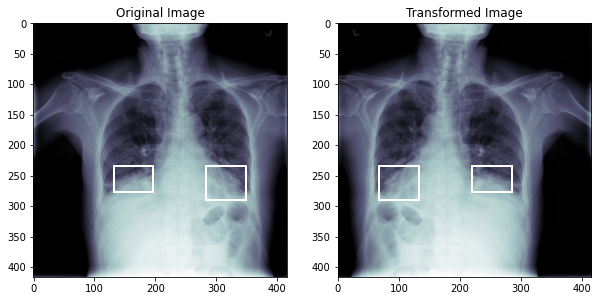

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(image, cmap=plt.cm.bone)
ax[0].set_title('Original Image')
for bb in bboxes:
   ax[0].add_patch(Rectangle(xy=(bb[0], bb[1]), width=bb[2], height=bb[3],
                                 linewidth=2, edgecolor='white', fill=False))

ax[1].imshow(transformed_image, cmap=plt.cm.bone)
ax[1].set_title('Transformed Image')
for bb in transformed_bboxes:
   ax[1].add_patch(Rectangle(xy=(bb[0], bb[1]), width=bb[2], height=bb[3],
                                 linewidth=2, edgecolor='white', fill=False))


##### c) Image augmentation on full dataset

In [228]:
# Function for transfrorming a particular image
def image_augmentation(image, bboxes, class_labels):
    # for bb in bboxes:
    print(sum(bboxes[0][0]))
    if (sum(bboxes[0][0])==0.0):
      transformed = {'image': image, 'bboxes': bboxes, 'class_labels': class_labels}
      return transformed
    transform = A.Compose([A.HorizontalFlip(p=0.5),
                       A.RandomBrightnessContrast(p=0.2)
                      ], bbox_params=A.BboxParams(format='coco', label_fields=['class_labels']))
    transformed = transform(image = image, bboxes = bboxes, class_labels = class_labels)
    return transformed

In [231]:
current_time = datetime.datetime.now(IST).strftime("%H:%M:%S")
print("Start Time =", current_time)
#transformed_array = []

transformed_array = list(map(image_augmentation, resized_array, df_class_info['coordinates'], df_class_info['target_class_labels']))
# transformed_array = np.array(list(map(transform_image(resized_array, coordinates, target_class_labels))))

current_time = datetime.datetime.now(IST).strftime("%H:%M:%S")
print("End Time =", current_time)

Start Time = 16:37:03


TypeError: ignored

In [236]:
coordinates[4]

array([list([107.25, 61.75, 86.53125, 153.96875]),
       list([228.3125, 61.75, 104.0, 184.03125])], dtype=object)

In [213]:
print(transformed_array)

[]


In [204]:
# Generic function for randomizing image augmentation
def augmentation(p=.5):
  return Compose([
        HorizontalFlip(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            RandomBrightness(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)

## Model Training

In [ ]:
!git clone https://github.com/kbardool/keras-frcnn.git

Cloning into 'keras-frcnn'...
remote: Enumerating objects: 635, done.
remote: Total 635 (delta 0), reused 0 (delta 0), pack-reused 635
Receiving objects: 100% (635/635), 187.79 KiB | 1.96 MiB/s, done.
Resolving deltas: 100% (433/433), done.


In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab/Capstone Project/dataset'

In [ ]:
!ls

'GCP Credits Request Link - RSNA.txt'	  stage_2_sample_submission.csv
 keras-frcnn				  stage_2_test_images
 pneumonia_data_resized.npz		  stage_2_train_images
 rsna-pneumonia-detection-challenge.zip   stage_2_train_labels.csv
 stage_2_detailed_class_info.csv
